# ANN Model - Hotel Booking

### Import Libraries

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


#import tensorlfow libraries
#import tensorflow
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

### Data Loading & Data Wragling

In [30]:
flname = 'hotel_bookings.csv'
df = pd.read_csv(flname)

In [31]:
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_month_year              119390 non-null  object 
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [33]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
nan_cols

['children', 'country', 'agent', 'company']

In [34]:
pd.set_options('display.max_columns', None)

AttributeError: module 'pandas' has no attribute 'set_options'

## Drop ID Feature from the dataset

In [16]:
# No ID is mentioned so we don't perform the drop strp

### Defining Target and Independent Features

In [17]:
Y = df['is_canceled']
x = df.drop(['is_canceled'], axis=1)

### Get the Cancelation Rate

In [18]:
Y.mean()

0.37041628277075134

### Split features into Numerical and Categorical

In [20]:
num = x.select_dtypes(include="number")
char= x.select_dtypes(include="object")

In [58]:
char

,hotel,arrival_month_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
1,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
2,Resort Hotel,July 2015,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,02-07-2015
3,Resort Hotel,July 2015,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,02-07-2015
4,Resort Hotel,July 2015,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,03-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August 2017,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,06-09-2017
119386,City Hotel,August 2017,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,07-09-2017
119387,City Hotel,August 2017,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,07-09-2017
119388,City Hotel,August 2017,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,07-09-2017


In [21]:
def unique_levels(x):
    x1 = x.value_counts().count()
    return x1

In [22]:
df_value_counts = pd.DataFrame(num.apply(lambda x:unique_levels(x)))
df_value_counts.head()

,0
lead_time,479
arrival_date_year,3
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17


In [72]:
slice1 = df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list = slice1.index
cat = num.loc[:, cat_list]
cat.dtypes

KeyError: 'feature_levels'

In [26]:
slice2 = df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list = slice2.index
num = num.loc[:, num_list]

KeyError: 'feature_levels'

In [27]:
num.dtypes
num.shape
char=pd.concat([char, cat], axis=1, join="inner")
char.head()

NameError: name 'cat' is not defined

### Outlier Analysis of Numerical Features

In [35]:
num.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85, 0.88, 0.9, 0.99])

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
1%,0.000000,2015.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,2015.000000,5.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000,38.400000,0.000000,0.000000
10%,3.000000,2015.000000,8.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,40.000000,0.000000,50.000000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000


### Capping and Flooring of outliers

In [36]:
def outlier_cap(x):
    x1 = x.clip(lower=x.quantile(0.01))
    x1 = x.clip(upper=x.quantile(0.99))
    return (x1)

In [38]:
num = num.apply(lambda x:outlier_cap(x))

In [39]:
num.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85, 0.88, 0.9, 0.99])

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.0,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,103.409180,2016.156554,27.165173,15.798241,0.919801,2.479211,1.852978,0.103186,0.0,0.031912,0.054309,0.060273,0.209574,86.008598,189.153115,1.606902,101.461197,0.062116,0.567845
std,104.600923,0.707476,13.605138,8.780829,0.957100,1.761267,0.487197,0.393713,0.0,0.175767,0.226628,0.376351,0.555245,108.591334,131.368699,9.760268,46.905155,0.241367,0.779257
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
1%,0.000000,2015.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,2015.000000,5.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000,38.400000,0.000000,0.000000
10%,3.000000,2015.000000,8.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.000000,40.000000,0.000000,50.000000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000


In [40]:
##Mising Value Analysis
num.isnull().mean()
char.isnull().mean()

hotel                      0.000000
arrival_month_year         0.000000
arrival_date_month         0.000000
meal                       0.000000
country                    0.004087
market_segment             0.000000
distribution_channel       0.000000
reserved_room_type         0.000000
assigned_room_type         0.000000
deposit_type               0.000000
customer_type              0.000000
reservation_status         0.000000
reservation_status_date    0.000000
dtype: float64

### Dropping variables that have 25% missing values

In [41]:
num = num.loc[:, num.isnull().mean() <=0.25]
num.isnull().mean()

lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
booking_changes                   0.000000
agent                             0.136862
days_in_waiting_list              0.000000
adr                               0.000000
required_car_parking_spaces       0.000000
total_of_special_requests         0.000000
dtype: float64

### Imputation of Missing Values

In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
num_1=pd.DataFrame(imputer.fit_transform(num), index=num.index, columns=num.columns)

num_1.isnull().mean()

lead_time                         0.0
arrival_date_year                 0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
booking_changes                   0.0
agent                             0.0
days_in_waiting_list              0.0
adr                               0.0
required_car_parking_spaces       0.0
total_of_special_requests         0.0
dtype: float64

### Categorical Imputation

In [44]:
charimputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
char_1 = pd.DataFrame(charimputer.fit_transform(char), index=char.index, columns=char.columns)

char_1.isnull().mean()

hotel                      0.0
arrival_month_year         0.0
arrival_date_month         0.0
meal                       0.0
country                    0.0
market_segment             0.0
distribution_channel       0.0
reserved_room_type         0.0
assigned_room_type         0.0
deposit_type               0.0
customer_type              0.0
reservation_status         0.0
reservation_status_date    0.0
dtype: float64

# Feature Selection - Numerical Features

### Part 1: Remove Features with 0 Variance

In [48]:
from sklearn.feature_selection import VarianceThreshold
varselector = VarianceThreshold(threshold=0)
varselector.fit_transform(num_1)

array([[3.4200e+02, 2.0150e+03, 2.7000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.4400e+02, 2.0150e+03, 2.7000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.0000e+00, 2.0150e+03, 2.7000e+01, ..., 7.5000e+01, 0.0000e+00,
        0.0000e+00],
       ...,
       [3.4000e+01, 2.0170e+03, 3.5000e+01, ..., 1.5771e+02, 0.0000e+00,
        3.0000e+00],
       [1.0900e+02, 2.0170e+03, 3.5000e+01, ..., 1.0440e+02, 0.0000e+00,
        0.0000e+00],
       [2.0500e+02, 2.0170e+03, 3.5000e+01, ..., 1.5120e+02, 0.0000e+00,
        2.0000e+00]])

In [49]:
#Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_2 = num_1.iloc[:,cols]

num_2.iloc[0]


lead_time                          342.000000
arrival_date_year                 2015.000000
arrival_date_week_number            27.000000
arrival_date_day_of_month            1.000000
stays_in_weekend_nights              0.000000
stays_in_week_nights                 0.000000
adults                               2.000000
children                             0.000000
is_repeated_guest                    0.000000
previous_cancellations               0.000000
previous_bookings_not_canceled       0.000000
booking_changes                      3.000000
agent                               86.008598
days_in_waiting_list                 0.000000
adr                                  0.000000
required_car_parking_spaces          0.000000
total_of_special_requests            0.000000
Name: 0, dtype: float64

### Part 1 - Bi Variant Analysis (Feature Discretization)

In [56]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
num_binned=pd.DataFrame(discrete.fit_transform(num_2), index=num_2.index, columns=num_2.columns).add_suffix('_Rank')
num_binned.tail()



C:\Users\atul7\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:236: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\atul7\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:236: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\atul7\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:236: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\atul7\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:236: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\atul7\anaconda3\lib\site-packages\sklearn\preprocessing\_discre

,lead_time_Rank,arrival_date_year_Rank,arrival_date_week_number_Rank,arrival_date_day_of_month_Rank,stays_in_weekend_nights_Rank,stays_in_week_nights_Rank,adults_Rank,children_Rank,is_repeated_guest_Rank,previous_cancellations_Rank,previous_bookings_not_canceled_Rank,booking_changes_Rank,agent_Rank,days_in_waiting_list_Rank,adr_Rank,required_car_parking_spaces_Rank,total_of_special_requests_Rank
119385,2.0,1.0,6.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0
119386,6.0,1.0,6.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,0.0,2.0
119387,3.0,1.0,6.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,0.0,2.0
119388,6.0,1.0,6.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0
119389,8.0,1.0,6.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,8.0,0.0,2.0


In [ ]:
#Check if the feature show a slope at all
#If they do, then do you see some declies below the population average and some higher than population average?
#If that is the case then the slope will be strong
#conclusion: A strong slope is indicative of the features ability to discriminate the event from non 
#       making it good predictor

In [60]:
x_bin_combined = pd.concat([Y, num_binned], axis=1, join='inner')
from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_bin_combined['is_canceled'].mean(), data=X_bin_combined, color='red')
    sns.barplot(x=col, y='is_canceled', data=X_bin_combined, estimator=mean)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
#check the decriptive statistics for the following features
# previous_booking_not_cancelled
# days_in_waiting_list
# booking_changes

In [ ]:
num_2['day_wait_ind'] = np.where(num_2['days_in_waiting_list'] >0, 1 , 0)
num_2['previous_bookings_not_canceled_ind'] = np.where(num_2['previous_bookings_not_canceled']>0, 1, 0)
num_2['booking_changes_ind'] = np.where(num_2['booking_changes']>0, 1, 0)

In [ ]:
num_carlist = ['arrival_date_day_of_month', 'arrival_date_week_number',
                     'days_in_waiting_list', 'previous_bookings_not_canceled', 'booking_changes']
num_2 = num_2.drop(num_varlist, axis=1)

In [ ]:
num_2.dtypes

In [ ]:
num_2.shape

# Part 2 - Select K Best

In [62]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=4)
selector.fit_transform(num_2, Y)

ValueError: Input X must be non-negative.

In [61]:
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_2.iloc[:,cols]
select_features_df_num.iloc[0]

NameError: name 'selector' is not defined

# Feature selection - Categorical Features

## Part 1 - Bi Variate Analysis

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged = pd.concat([Y, char], axis=1, join='inner')

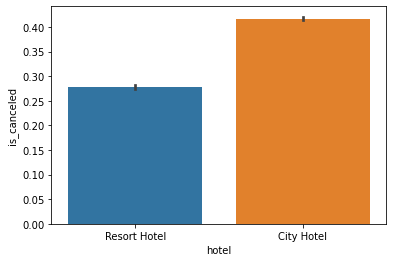

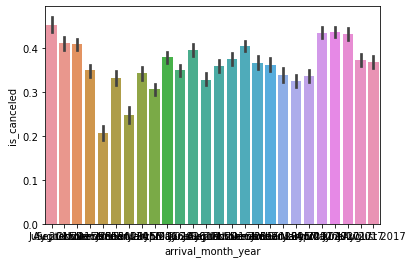

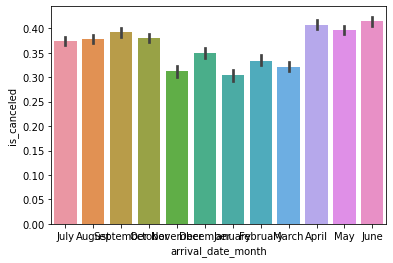

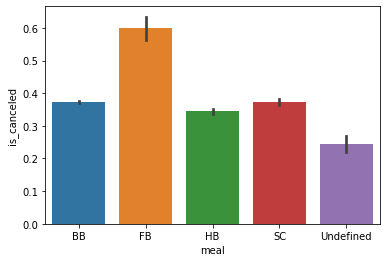

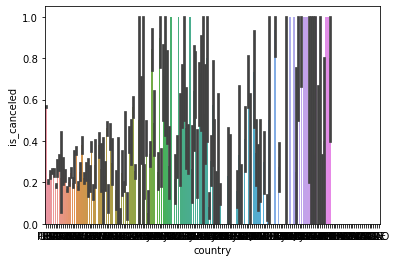

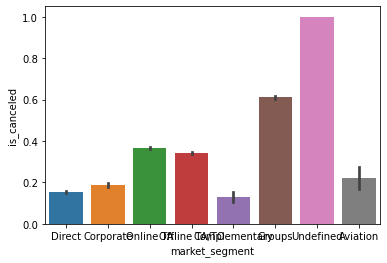

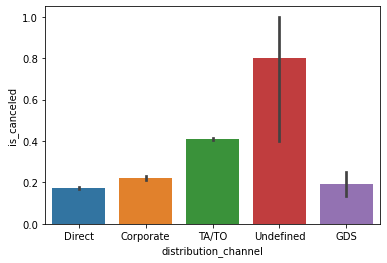

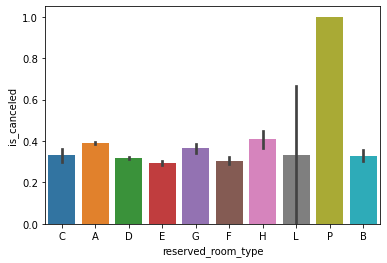

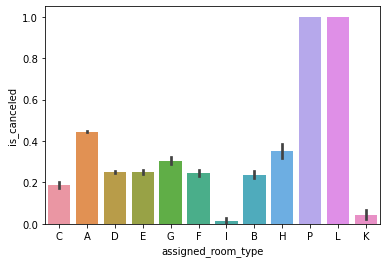

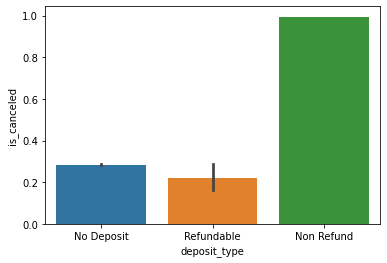

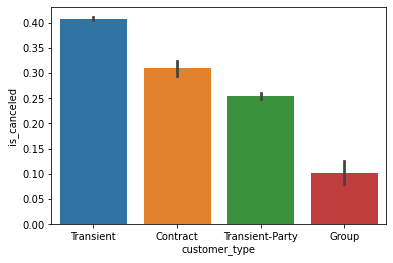

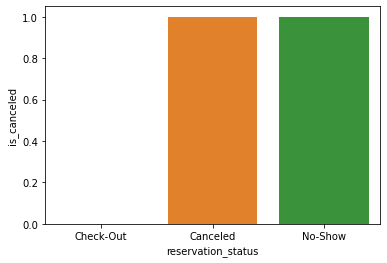

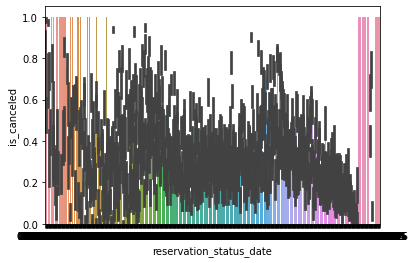

KeyError: "['arrival_date_year'] not found in axis"

In [71]:
from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="is_canceled", data=X_char_merged, estimator=mean)
plt.show()

charlist = ['arrival_date_month', 'country', 'assigned_room_type', 'reservation_status',
            'reservation_status_date', 'arrival_date_year']

char_1 = char_1.drop(charlist, axis=1)
char_1.dtypes


In [ ]:
# create dummy feature with n-1 levels
X_char_dum = pd.get_dummies(char_1, drop_first = True)
X_char_dum.shape

# Part 2 - Select K Best

In [69]:
# Select K Best for Categorical features
from sklearn.feature_selection import SelectKBest, chi2
select = SelectKBest(chi2, k=100)
selector.fit_transform(X_char_dum, Y)

NameError: name 'X_char_dum' is not defined

In [ ]:
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.ilo[:, cols]

In [ ]:
select_features_df_char.iloc[0]

# Creating the Master Feature Set for Model Development

In [65]:
X_all = pd.concat([select_features_df_char, select_features_df_num], axis=1, join='inner')

NameError: name 'select_features_df_char' is not defined

## Train Text Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.3, random_state=20)

In [ ]:
print("Shape of training data", X_train.shape)
print("Shape of Testing Data", X_test.shape) 
print("Response Rate in Training Data", y_train.mean())
print("Response Rate Testing Data", y_test.mean())

In [ ]:
#Non Linearly in feature relationships are observed which make tree methods a good choice
#There are few options to consider among tree methods
#white box (Completly Explainable Set of Rules) - Decision Tree
#Ensemble Methods - Random Forest (with Bagging)
# Ensemble Methods - GBM.XGBoost (Boosting)

### Building a Decision Tree Model

In [ ]:
from sklearn.tree import DesicionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', random_state=20)

In [ ]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth':[3, 5, 6, 7], 'min_samples_split':[140, 280, 420, 560, 700]}
tree_grid = GridSearchCV(dtree, cv=10, param_grid=param_dist, n_jobs=3)
tree_grid.fit(X_train, y_train)
print("Best Parameters using grid search :\n" tree_grid.best_params_)

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=9, min_sample_split=140)
dtree.fit(X_train, y_train)

### Building A Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClasssifier
rf = RandomForestClassifier(criterion='gini', random_state=0, max_depth=9, min_samples_split=140)
rf.fit(X_train, y_train)

### Building a Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(criterion='mse', random_state=0, max_depth=9, min_sample_split=140)
gbm.fit(X_train, y_train)


### Model Evaluation

In [ ]:
y_pred_tree = dtree.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbm = gbm.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
print("Accuracy : ", metric.accuracy_score(y_test, y_pred_tree))
print("Precision : ", metric.precision_score(y_test, y_pred_tree))
print("Recall : ", metric.recall_score(y_test, y_pred_tree))
print("f1_score : ", metric.f1_score(y_test, y_pred_tree))

In [ ]:
metric.plot_confusion_matrix(dtree, x_all, Y)

In [ ]:
print("Random Forest Model")
print("Accuracy : ", metric.accuracy_score(y_test, y_pred_rf))
print("Precision : ", metric.precision_score(y_test, y_pred_rf))
print("Recall : ", metric.recall_score(y_test, y_pred_rf))
print("f1_score : ", metric.f1_score(y_test, y_pred_rf))

In [ ]:
metric.plot_confusion_matrix(rf, X_all, Y)

In [ ]:
print("Gradient Boosting Model")
print("Accuracy : ", metric.accuracy_score(y_test, y_pred_gbm))
print("Precision : ", metric.precision_score(y_test, y_pred_gbm))
print("Recall : ", metric.recall_score(y_test, y_pred_gbm))
print("f1_score : ", metric.f1_score(y_test, y_pred_gbm))

# Decision Tree Larenz curve

In [ ]:
y_pred_prob = gbm.predict_proba(x_all)[:, 1]
df['y_pred_p'] = pd.DataFrame(y_pred_prob)
df['P_Rank_dtree'] = pd.qcut(df['y_pred_P'].rank(method='first').values, 10, duplicates='drop').codes+1
rank_df_actuals = df.groupby('P_Rank_dtree')['is_canceled'].agg(['count, 'mean'])
rank_df_predicted = df.groupby('P_Rank_dtree')['y_pred_p'].agg(['mean'])
rank_df_actuals = pd.DataFrame(rank_df_actuals)

In [ ]:
rank_df_actuals.rename(columns={'mean':'Actual_event_rate'}, inplace=True}
rank_df_predicted = pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'}, inplace=True)
rank_df = pd.concat([rank_df_actuals,rank_df_predicted], axis=1, join='inner')

In [ ]:
sorted_rank_df = rank_df.sort_values(by='P_Rank_dtree', ascending=False)
sorted_rank_df['N_events'] = rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events'] = sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap'] = sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap'] = sorted_rank_df['non_event_cap'].cumsum()


In [ ]:
sorted_rank_df['N_non_events'] = sorted_rank_df['count'].sorted_rank_df['N_events']
sorted_rank_df['cum_non_events'] = sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap'] = sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap'] = sorted_rank_df['non_event_cap'].cumsum()


In [ ]:

sorted_rank_df['KS'] = round(sorted_rank_df['cum_event_cap'] - sorted_rank_df['cum_non_event_cap']), 4)

sorted_rank_df['random_cap'] = sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df[cum_random_cap'] = sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile'] = sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg'] = sorted_reindexed['Actual_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sort
sorted_reindexed


In [ ]:
fig,axes = plt.subplots(1, 3, sharex=True, figsize=(15, 5))
fig.suptitle('Effectivness of Declies based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Event Rate')
axes[1].set_title('Lift over Mean Event Rate')
axes[2].set_title('Gains Chart')
sns.lineplot(ax=axes[0], x="Decile" y="Actual_event_rate", data=sorted_reindexed, color='red')
sns.barplot(ax=axes[1], x="Decile" y="Lift_over_Avg", data=sorted_reindexed, color='green')
sns.lineplot(ax=axes[2], x="Decile" y="cum_event_cap", data=sorted_reindexed, color='blue')
sns.lineplot(ax=axes[2], x="Decile" y="cum_random_cap", data=sorted_reindexed, color='blank')


### Audience

In [ ]:
df['Predicted_cancel_Rank'] = np.where(df['P_Rank_dtree']<8, "Bottom7", "Top3")
df.Predicted_cancel_Rank.value_counts()

df_top3 = df.loc[df['Predicted_cancel_Rank'] == 'Top3', :]

df_top3.shape

### Prioritization

In [ ]:
df['lead_time_RANK'] = pd.qcut(df['lead_time'].rank(methods='first').values, 10, duplicates='drop').codes+1

df.groupby('lead_time_RANK')['lead_time'].agg(['min', 'mean', 'max'])

df.lead_time.mean()

df['lead_time_segment'] = np.where([df['lead_time_RANK']>=7, "High Lead Time", "Low Lead Tiem")
df.lead_time_segment.value_counts()

df['adr_RANK'] = pd.qcut(df['adr'].rank(method='first').values, 10, duplicates='drop').codes+1
df.groupby('adr_RANK')['adr'].agg(['min', 'mean', 'max'])

df.adr.mean()

df['adr_segment'] = np.where(df['adr_RANK']>=7,"High ADR", "Low ADR")
df.adr_segment.value_couns()

pd.crosstab(index=df['adr_segment'], columns=df['lead_time_segment'], values=df['adr'], aggfunc='mean')

pd.crosstab(index=df['adr_segment'], columns=df['lead_time_segment'], values=df['is_canceled'], aggfunc='mean')


### Treatment

In [ ]:
service_list = ['stays_in_weekend_nights', 'total_of_special_requests', 'reserved_room_type']

df_top3_servies =df_top3[service_list]

for col in (df_top3_services.columns):
    plt.figure()
    sns.countplot(x=col, data=df_top3_services)
plt.show()

In [ ]:
metric.plot_confusion_matrix(rf, X_all, Y)